###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

## Exercise 1: Exploring Movie Recommendation Dataset

In [1]:
#Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
movie_lens=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 10\\ml-100k\\u.data",header=None,delim_whitespace=True)

In [3]:
movie_lens.columns =['user id','item id','rating','timestamp']

In [4]:
np.shape(movie_lens)
movie_lens.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
u_info=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 10\\ml-100k\\u.info",header=None,delim_whitespace=True)

In [6]:
u_info.head()

,0,1
0,943,users
1,1682,items
2,100000,ratings


In [7]:
u_item=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 10\\ml-100k\\u.item",header=None,delimiter='|')

In [8]:
u_item.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
u_item.columns =["movie id","movie title","release date","video release date","IMDb URL","unknown","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]

In [10]:
u_item.iloc[1,:]

movie id                                                              2
movie title                                            GoldenEye (1995)
release date                                                01-Jan-1995
video release date                                                  NaN
IMDb URL              http://us.imdb.com/M/title-exact?GoldenEye%20(...
unknown                                                               0
Action                                                                1
Adventure                                                             1
Animation                                                             0
Children's                                                            0
Comedy                                                                0
Crime                                                                 0
Documentary                                                           0
Drama                                                           

In [11]:
u_genre =pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 10\\ml-100k\\u.genre",header=None,delimiter='|')

In [12]:
u_genre.columns =["movie genre","movie id"]
u_genre

,movie genre,movie id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [13]:
u_user=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 10\\ml-100k\\u.user",header=None,delimiter='|')

In [14]:
u_user.columns =["user id","age","gender","occupation","zip code"]

In [15]:
u_user

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [16]:
u_occupation=pd.read_csv("C:\\Users\\Sharon\\ML_LAB\\Lab 10\\ml-100k\\u.occupation",header=None,delim_whitespace=True)

In [17]:
u_occupation.head()

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [18]:
np.shape(u_item)

(1682, 24)

In [19]:
movie_lens

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [20]:
rating=movie_lens.groupby(['rating']).count()
rating

,user id,item id,timestamp
rating,,,
1,6110,6110,6110
2,11370,11370,11370
3,27145,27145,27145
4,34174,34174,34174
5,21201,21201,21201


In [21]:
movie_lens['rating'].unique()

array([3, 1, 2, 4, 5], dtype=int64)

#### 1) Showcase how the ratings vary across users, as an example consider whether the plot is able to tell if most ratings are only from a handful of users.

In [22]:
users=movie_lens.groupby(['user id']).count()
users

,item id,rating,timestamp
user id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175
...,...,...,...
939,49,49,49
940,107,107,107
941,22,22,22


<function matplotlib.pyplot.show(close=None, block=None)>

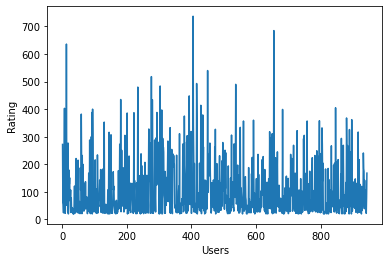

In [23]:
plt.plot(movie_lens.groupby(['user id']).count()['rating'])
plt.xlabel('Users')
plt.ylabel('Rating')
plt.show

#### 2) Showcase how the ratings vary across items.

Text(0, 0.5, 'Items')

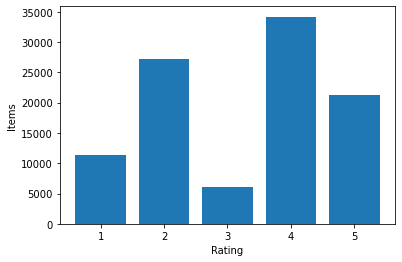

In [24]:
plt.bar(movie_lens['rating'].unique(),rating["item id"])
plt.xlabel('Rating')
plt.ylabel('Items')

In [25]:
df_genre= pd.merge(movie_lens, u_genre,  left_on='item id', right_on='movie id')

In [26]:
df_genre.groupby(['movie genre','rating']).count()

user id  item id  timestamp  movie id
movie genre rating                                       
Action      1             8        8          8         8
            2            27       27         27        27
            3            96       96         96        96
            4           202      202        202       202
            5           119      119        119       119
...                     ...      ...        ...       ...
Western     1             2        2          2         2
            2             2        2          2         2
            3             3        3          3         3
            4             2        2          2         2
            5             1        1          1         1

[90 rows x 4 columns]

In [27]:
df_genre['movie genre'].unique()

array(['Action', 'Thriller', "Children's", 'Sci-Fi', 'Comedy', 'Romance',
       'Adventure', 'Film-Noir', 'Documentary', 'Horror', 'Animation',
       'Musical', 'War', 'Drama', 'Mystery', 'Fantasy', 'Crime',
       'Western'], dtype=object)

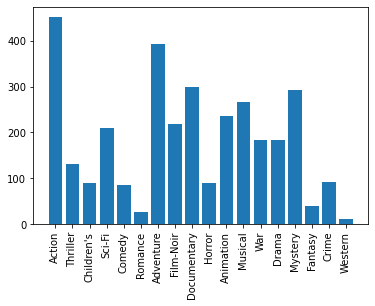

In [28]:
plt.bar(df_genre['movie genre'].unique(),df_genre.groupby(['movie genre']).size())
plt.xticks(rotation=90)
plt.show()

In [29]:
df_merge_col = pd.merge(movie_lens, u_item,  left_on='item id', right_on='movie id')

df_merge_col.head()

,user id,item id,rating,timestamp,movie id,movie title,release date,video release date,IMDb URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
genre=df_merge_col.groupby(['rating']).sum()
genre.iloc[:,5:].sum()

unknown           10
Action         25589
Adventure      13753
Animation       3605
Children's      7182
Comedy         29832
Crime           8055
Documentary      758
Drama          39895
Fantasy         1352
Film-Noir       1733
Horror          5317
Musical         4954
Mystery         5245
Romance        19461
Sci-Fi         12730
Thriller       21872
War             9398
Western         1854
dtype: int64

#### 3) Are there genres that are more highly rated than others?

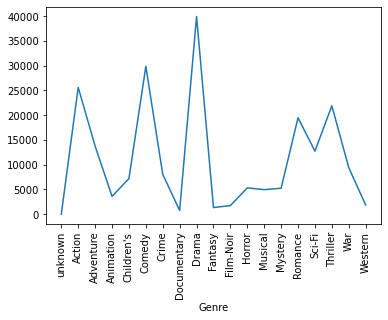

In [31]:
plt.plot(genre.iloc[:,5:].sum())
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.show()

#### Thus we can see Drama has one of the highest rating

In [32]:
movie_user1 = pd.merge(movie_lens, u_user,  on='user id')

movie_user1

,user id,item id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105
...,...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student,97229
99996,941,273,3,875049038,20,M,student,97229
99997,941,1,5,875049144,20,M,student,97229
99998,941,294,4,875048532,20,M,student,97229


In [33]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
movie_user1['age_group'] = pd.cut(movie_user1.age, range(0, 81, 10), right=False, labels=labels)
movie_user1[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,49,40-49
39,39,30-39
131,25,20-29
259,28,20-29
497,47,40-49
517,44,40-49
644,31,30-39
736,26,20-29
833,23,20-29
1055,42,40-49


In [34]:
movie_user1.tail()

,user id,item id,rating,timestamp,age,gender,occupation,zip code,age_group
99995,941,919,5,875048887,20,M,student,97229,20-29
99996,941,273,3,875049038,20,M,student,97229,20-29
99997,941,1,5,875049144,20,M,student,97229,20-29
99998,941,294,4,875048532,20,M,student,97229,20-29
99999,941,1007,4,875049077,20,M,student,97229,20-29


In [35]:
df_mov_user_gen = pd.merge(movie_user1,u_genre, left_on='item id', right_on='movie id')
#df_mov_user_gen.shape


In [36]:
df_mov_user_gen.tail()

,user id,item id,rating,timestamp,age,gender,occupation,zip code,age_group,movie genre,movie id
3292,207,18,2,877878739,39,M,marketing,92037,30-39,Western,18
3293,14,18,3,879119260,45,M,scientist,55106,40-49,Western,18
3294,385,18,5,884915008,36,M,writer,10003,30-39,Western,18
3295,585,18,2,891283124,69,M,librarian,98501,60-69,Western,18
3296,655,18,3,888984478,50,F,healthcare,60657,50-59,Western,18


In [37]:
df_output = df_mov_user_gen[['age_group','movie genre','user id']]
df_output.head()

,age_group,movie genre,user id
0,40-49,Drama,196
1,40-49,Drama,298
2,30-39,Drama,115
3,20-29,Drama,253
4,40-49,Drama,6


In [38]:
df_output = df_output.groupby(['age_group','movie genre']).count()


In [39]:
df_output.tail()

user id
age_group movie genre         
70-79     Romance            0
          Sci-Fi             0
          Thriller           0
          War                0
          Western            0

In [40]:
g = df_output['user id'].groupby(level=0, group_keys=False) # group by the first level of index
#res = g.apply(lambda x: x.order(ascending=False)) # sort within each group in descending order 
res = g.apply(lambda x: x.sort_values(ascending=False))
res = pd.DataFrame(res) #convert series to dataframe 
res.head()

user id
age_group movie genre         
0-9       Documentary        1
          Adventure          1
          Action             0
          Horror             0
          War                0

In [41]:
res = res.reset_index()
res = res.groupby(['age_group']).first()
res = res.rename(columns={'user id':'Total Users'})
res = res.reset_index()
res

,age_group,movie genre,Total Users
0,0-9,Documentary,1
1,10-19,Action,37
2,20-29,Action,189
3,30-39,Action,121
4,40-49,Action,70
5,50-59,Fantasy,34
6,60-69,Fantasy,12
7,70-79,Children's,2


In [42]:
genre = res['movie genre']

#### 4) What age groups prefer what genres based on ratings? You can bin respective ages to your preference.


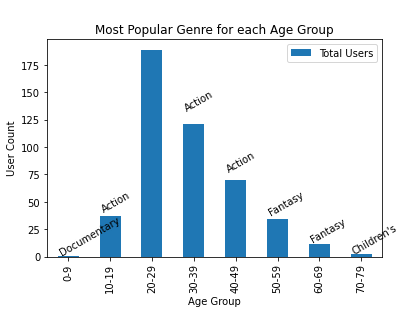

In [43]:
ax = res.plot.bar(x='age_group', y=['Total Users'] , title='Most Popular Genre for each Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('User Count')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.annotate(genre[i] , xy=((p.get_x()), (p.get_height()*1.1)), rotation=30)
    i = i +1

plt.show()

#### References
 - https://github.com/anushajain28/MovieLens-Dataset-Analysis/blob/master/Analysis/Analysis_3.ipynb